In [1]:
import sys
sys.path.append('../')

from FeatureModels import *
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2 

In [4]:
sensor = 's'
fill = '_fill'

district = 'Mean'

#savePath = 'Results/Results RF large periods.xlsx'

In [5]:
params = { 
    'n_estimators': np.linspace(1, 1000, 5).round().astype('int'),
    'max_depth' : [2, 3],
    'learning_rate' : [0.05, 0.1],
    'max_features': np.linspace(0.1, 1, 5),
    'subsample': [0.5, 1.0],
}
params

{'n_estimators': array([   1,  251,  500,  750, 1000]),
 'max_depth': [2, 3],
 'learning_rate': [0.05, 0.1],
 'max_features': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
 'subsample': [0.5, 1.0]}

## Модели, обученные за года

In [6]:
model = GradientBoostingRegressor(random_state = 100)

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.325, 'n_estimators': 500, 'subsample': 1.0}",,,
MSE,10.6217,172.7882,392.8767
MAE,2.3450,7.5264,14.6665
MAPE,0.1962,0.4940,0.4196
R2,0.9868,0.8116,0.7047


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.07it/s]


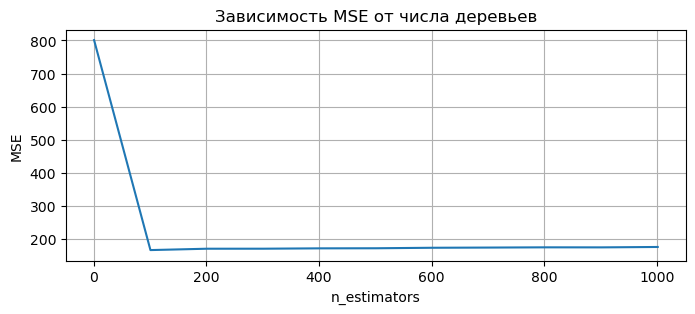

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.01it/s]


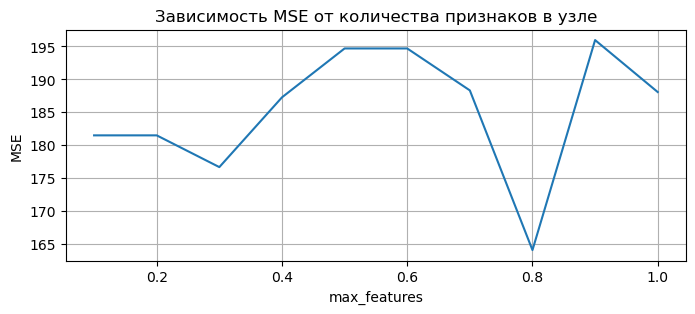

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 1.0, 'n_estimators': 251, 'subsample': 0.5}",,,
MSE,45.6720,193.3533,53.9973
MAE,4.7052,8.2270,5.5334
MAPE,0.3645,0.4705,0.4238
R2,0.9391,0.8384,0.4395


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:06<00:00,  1.80it/s]


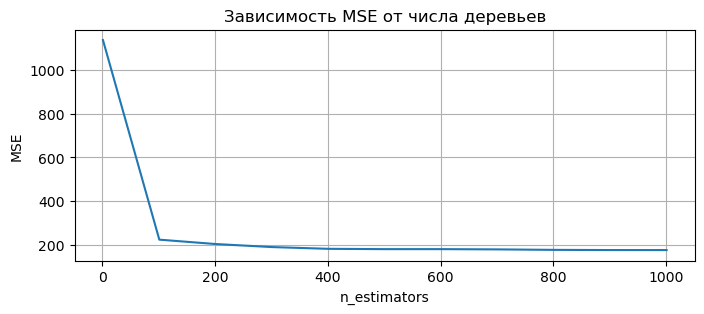

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.25it/s]


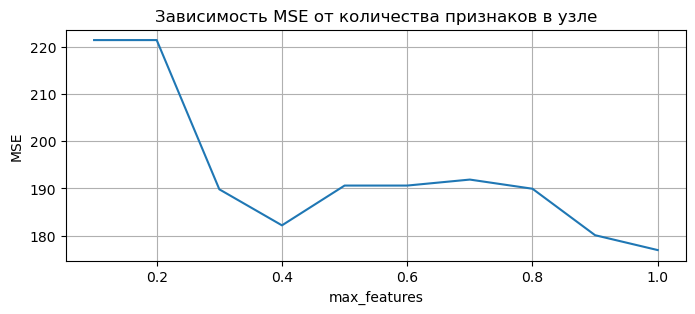

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.325, 'n_estimators': 251, 'subsample': 1.0}",,,
MSE,33.4837,212.4413,61.9530
MAE,3.9437,8.5184,5.6665
MAPE,0.3026,0.5544,0.7130
R2,0.9619,0.7621,-0.2715


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:07<00:00,  1.56it/s]


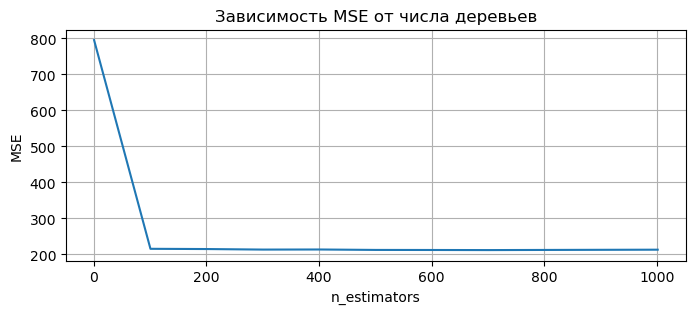

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.44s/it]


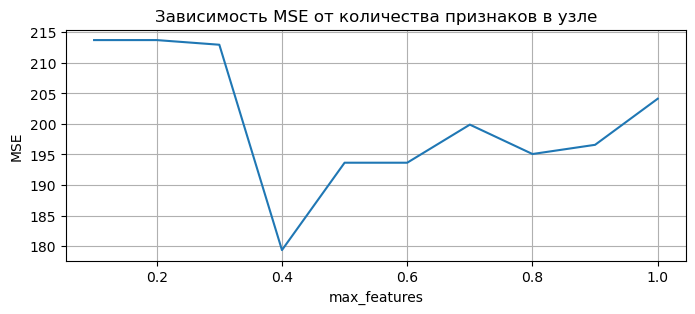

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.1, 'n_estimators': 500, 'subsample': 0.5}",,,
MSE,41.2993,174.4898,35.4359
MAE,4.4534,8.3384,4.8011
MAPE,0.3319,0.5968,0.6626
R2,0.9517,0.8159,0.2048


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.73it/s]


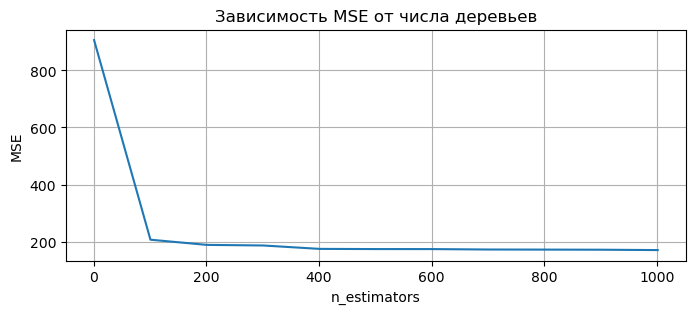

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.27it/s]


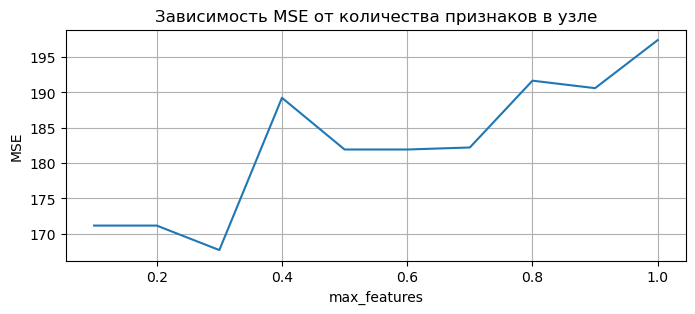

In [7]:
# Срез данных от begin до end
begin, end = '2020-01-01', '2023-04-06'

for season in ['winters', 'springs', 'summers', 'autumns']:
    test_index = pd.read_csv(f"../data/test_index.csv", sep = ';', dayfirst=True, parse_dates = [season])[season].values
    ModelProcessing(model, sensor, fill, district, begin, end, season = '', test_index = test_index, params = params, gridSearch = True, paramDependencies = True, plotRes = False, featImp = False)

## Сезонные модели

In [8]:
begin, end = '2019-01-01', '2023-04-06'

for season in ['winters', 'springs', 'summers', 'autumns']:
    test_index = pd.read_csv(f"../data/test_index.csv", sep = ';', dayfirst=True, parse_dates = [season])[season].values
    ModelProcessing(model, sensor, fill, district, begin, end, season = season, test_index = test_index, params = params, gridSearch = True, paramDependencies = False, plotRes = False, featImp = False)

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.775, 'n_estimators': 251, 'subsample': 0.5}",,,
MSE,39.9416,792.1815,577.1694
MAE,5.1366,17.5315,17.1519
MAPE,0.2022,0.3754,0.5002
R2,0.9803,0.6115,0.5661


Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 0.325, 'n_estimators': 251, 'subsample': 1.0}",,,
MSE,5.8930,41.5085,44.8527
MAE,1.8890,4.9243,4.6110
MAPE,0.1809,0.3403,0.3802
R2,0.9530,0.6202,0.5344


Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.1, 'n_estimators': 251, 'subsample': 0.5}",,,
MSE,4.3240,22.1140,22.3123
MAE,1.5264,3.5127,3.7944
MAPE,0.2019,0.5167,0.4634
R2,0.8922,0.0074,0.5421


Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.55, 'n_estimators': 251, 'subsample': 1.0}",,,
MSE,1.3134,26.0024,23.7800
MAE,0.9082,3.4924,3.9319
MAPE,0.1194,0.4000,0.5991
R2,0.9803,0.4337,0.4663
